In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importer les données et détecter les anomalies dans les données

In [2]:
Dataset = pd.read_csv('train.csv')

c:\programdata\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
Dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [18]:
Dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [13]:
Dataset.shape

(1017209, 9)

In [5]:
Data_Nan = Dataset.loc[Dataset.isnull().any(axis=1),:]
Data_Nan

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [6]:
for col in Dataset.columns.values :
    print(col, Dataset.loc[Dataset[col].isnull(),:])

Store Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []
DayOfWeek Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []
Date Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []
Sales Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []
Customers Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []
Open Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []
Promo Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday]
Index: []
StateHoliday Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, Scho

In [27]:
Dataset.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Week
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,2.361551e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,1.443338e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.100000e+01
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,2.200000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,3.500000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,5.200000e+01


There is no Nan in the whole Dataset.

In [15]:
Data_sal = Dataset.loc[Dataset['Sales'] >= 1, :]
Data_anomalie = Data_sal.loc[Data_sal['Open'] == 0]
Data_anomalie

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


In [40]:
Stores = pd.read_csv('store.csv')
Stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [41]:
Stores.shape

(1115, 10)

In [43]:
Dataset = Dataset.merge(Stores, on = 'Store')

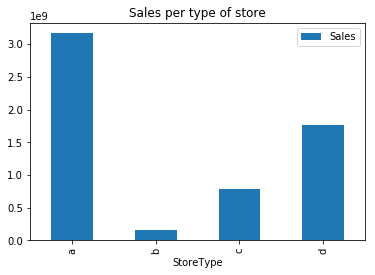

In [49]:
Stores_rep = Dataset[['StoreType','Sales']].groupby(by='StoreType').sum().plot(kind = "bar", title = "Sales per type of store")


### Transforming the data


In [ ]:
Transforming the timestamps to a more useful format

In [24]:
Dataset['Date'] = pd.to_datetime(Dataset['Date'], format='%Y-%m-%d')
Dataset['Year'] = pd.DatetimeIndex(Dataset['Date']).year
Dataset['Week'] = pd.DatetimeIndex(Dataset['Date']).weekofyear

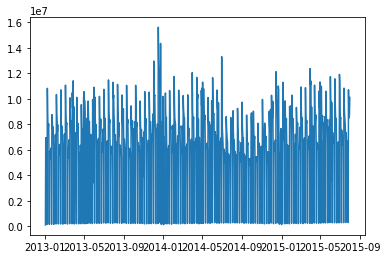

In [35]:
Repart_Weeks = Dataset[['Sales','Date']].groupby(by='Date').sum()
Repart_Weeks.reset_index(inplace=True) 
Repart_Weeks = Repart_Weeks.sort_values(by='Date')
plt.plot(Repart_Weeks['Date'], Repart_Weeks['Sales'])

In [37]:
Repart_Stores = Dataset[['Store', 'Sales']].groupby(by='Store').sum().sort_values(by='Store')
Repart_Stores.describe()

,Sales
count,1.115000e+03
mean,5.267427e+06
std,1.951304e+06
min,2.114322e+06
25%,3.949377e+06
50%,4.990259e+06
75%,6.084148e+06
max,1.951684e+07


One hot encoding on State Holiday

In [28]:
Dataset[['StateHoliday','Store']].groupby(by ='StateHoliday').count()

,Store
StateHoliday,
0,131072
0,855087
a,20260
b,6690
c,4100


We can see that there is a format issue for this column (str and int). We're going to transform the format of the data then one-hot encode it

In [30]:
Dataset['StateHoliday'] = Dataset['StateHoliday'].astype('str')

In [31]:
Dataset[['StateHoliday','Store']].groupby(by ='StateHoliday').count()

,Store
StateHoliday,
0,986159
a,20260
b,6690
c,4100


The issue with the 0s is resolved (NB : we could also change the import function)

In [ ]:
from sklearn.preprocessing import OneHotEnconder, LabelEncoder
LB = LabelEncoder()
LabelEncoder.fit(Dataset['StateHoliday'])

In [ ]:
Merge with Sales
Correlation Matrix (.corr())
Predict XGBoost
Get relative precision
if value > 3*ecart + prd value or < : outlier

In [ ]:
OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
IsolationForest(contamination=outliers_fraction)